In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import seaborn as sns

In [4]:
data = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [6]:
data = data.astype(np.int8)

In [7]:
data.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [8]:



data.isna().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [9]:
## See which cols are continuous variables and which are categorical cariables
for col in data.columns:
    print('{} : {}' .format(col, data[col].unique()))

HeartDiseaseorAttack : [0 1]
HighBP : [1 0]
HighChol : [1 0]
CholCheck : [1 0]
BMI : [40 25 28 27 24 30 34 26 33 21 23 22 38 32 37 31 29 20 35 45 39 19 47 18
 36 43 55 49 42 17 16 41 44 50 59 48 52 46 54 57 53 14 15 51 58 63 61 56
 74 62 64 66 73 85 60 67 65 70 82 79 92 68 72 88 96 13 81 71 75 12 77 69
 76 87 89 84 95 98 91 86 83 80 90 78]
Smoker : [1 0]
Stroke : [0 1]
Diabetes : [0 2 1]
PhysActivity : [0 1]
Fruits : [0 1]
Veggies : [1 0]
HvyAlcoholConsump : [0 1]
AnyHealthcare : [1 0]
NoDocbcCost : [0 1]
GenHlth : [5 3 2 4 1]
MentHlth : [18  0 30  3  5 15 10  6 20  2 25  1  4  7  8 21 14 26 29 16 28 11 12 24
 17 13 27 19 22  9 23]
PhysHlth : [15  0 30  2 14 28  7 20  3 10  1  5 17  4 19  6 12 25 27 21 22  8 29 24
  9 16 18 23 13 26 11]
DiffWalk : [1 0]
Sex : [0 1]
Age : [ 9  7 11 10  8 13  4  6  2 12  5  1  3]
Education : [4 6 3 5 2 1]
Income : [3 1 8 6 4 7 2 5]


In [10]:
for col in data.columns:
    if(len(data[col].unique()) > 2):
        print('{} Length: {}'.format(col, len(data[col].unique())))
        print('{} : {}' .format(col, np.sort(data[col].unique())))

BMI Length: 84
BMI : [12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35
 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89 90 91 92 95 96 98]
Diabetes Length: 3
Diabetes : [0 1 2]
GenHlth Length: 5
GenHlth : [1 2 3 4 5]
MentHlth Length: 31
MentHlth : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]
PhysHlth Length: 31
PhysHlth : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]
Age Length: 13
Age : [ 1  2  3  4  5  6  7  8  9 10 11 12 13]
Education Length: 6
Education : [1 2 3 4 5 6]
Income Length: 8
Income : [1 2 3 4 5 6 7 8]


+ There are no feature whose data type is object and all features' data type are int
+ Some of the features can be ordinal while some of them must be encoded as they are categorical features

+ Categorical features:
    + HeartDiseaseorAttack(Target)
    + HighBP(Blood Pressure)
    + HighChol(cholesterol, maybe not sure)
    + CholCheck(cholesterol check)
    + Smoker
    + Stroke
    + PhysActivity : Physical Activity
    + Fruits
    + Veggies
    + Diabetes(There are three types of diabetes, type1 type2 and Gestational Diabetes, as Gestational Diabetes only develops in pragnant women, I assume in this data set 1 presents type 1, 2 presents type 2 and 0 presents no diabete)
    + HvyAlcoholConsump: Heavy AlcoholConsump
    + AnyHealthcare: Is receiving any health care or Have received any health care
    + NoDocbcCost
+ Ordinal features: 
    + Income
    + Education
    + Age
    + PHSyHlth : Physical Health
    + MenHlth: Mental Health
    + GenH : Heneral Health
+ Continuous or Ordinal feature:
    + BMI

### Now have a look at the features vs the target

In [10]:
len(data.columns)

22

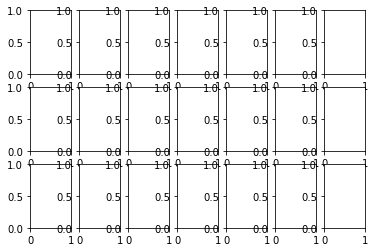

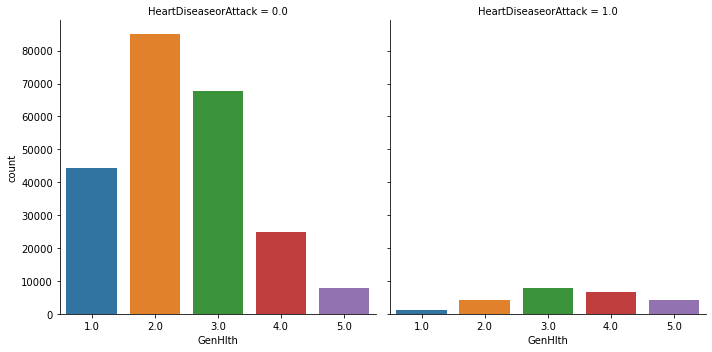

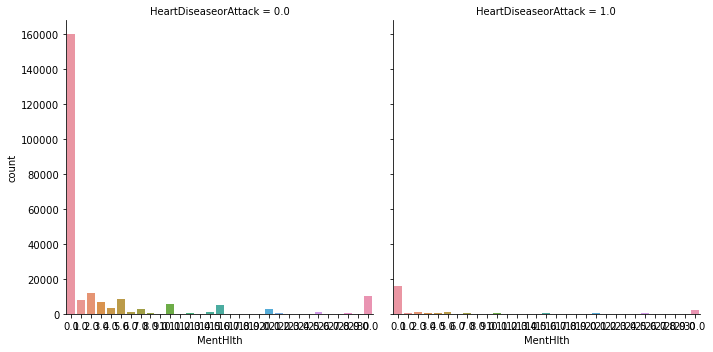

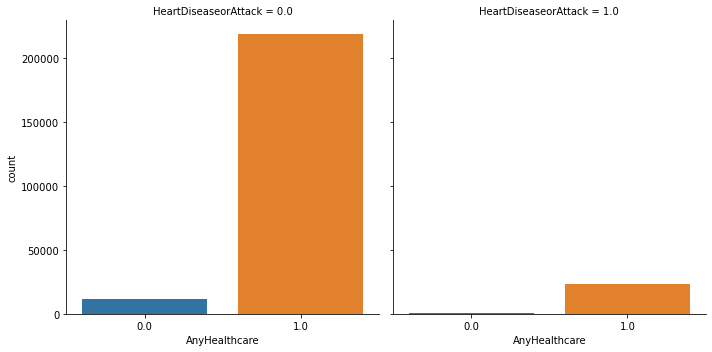

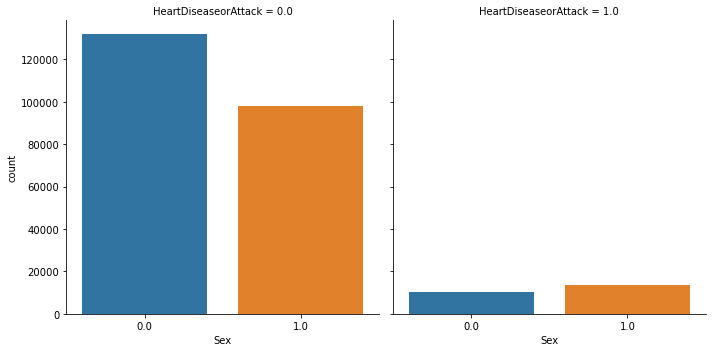

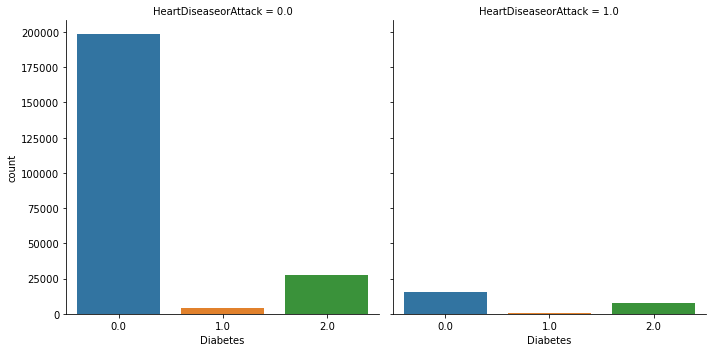

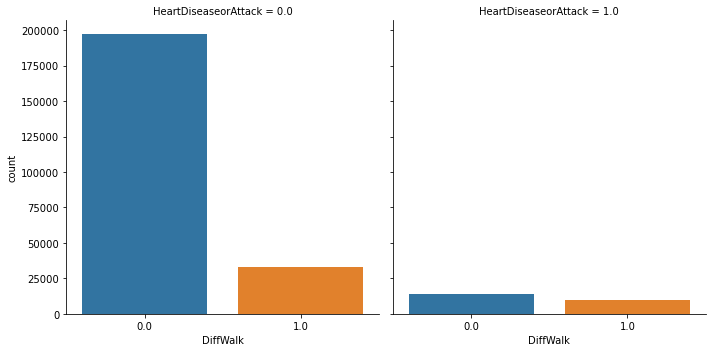

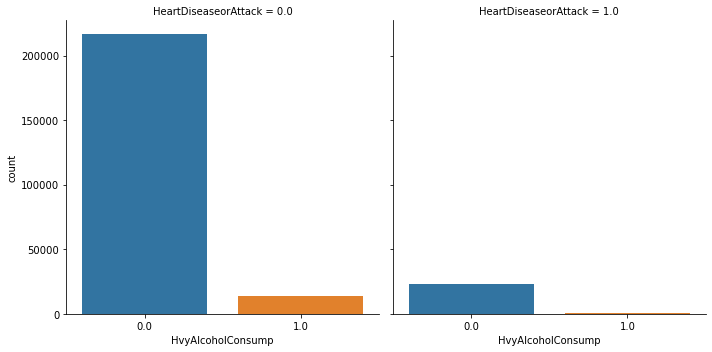

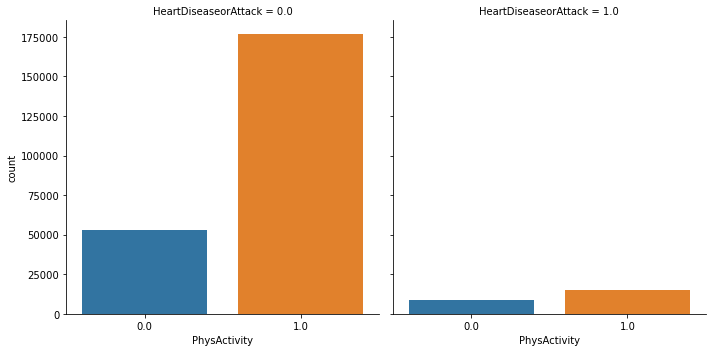

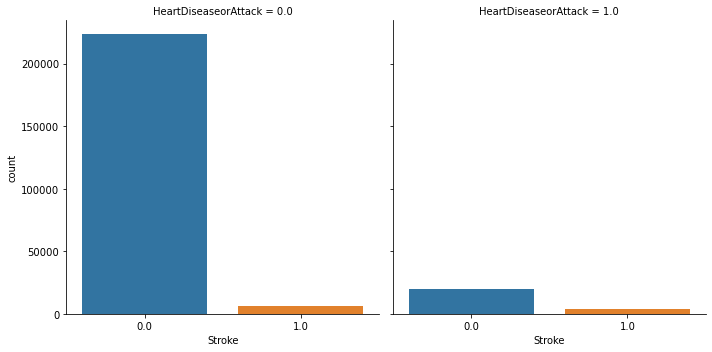

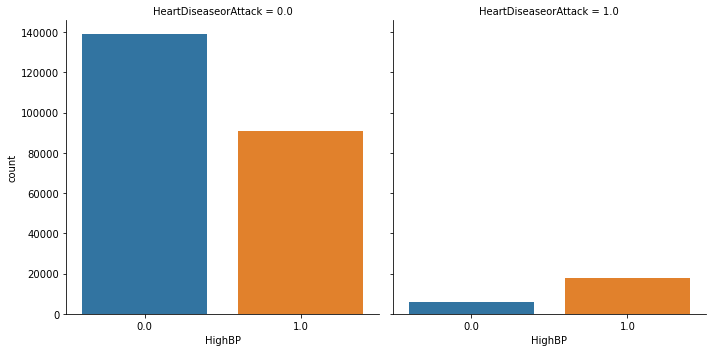

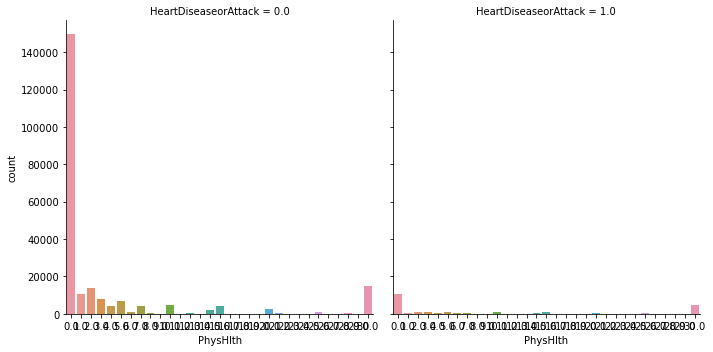

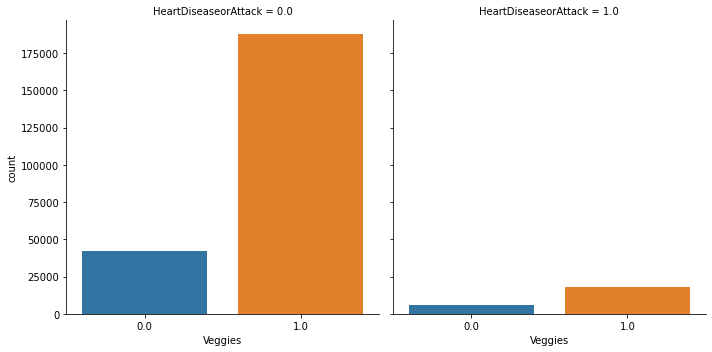

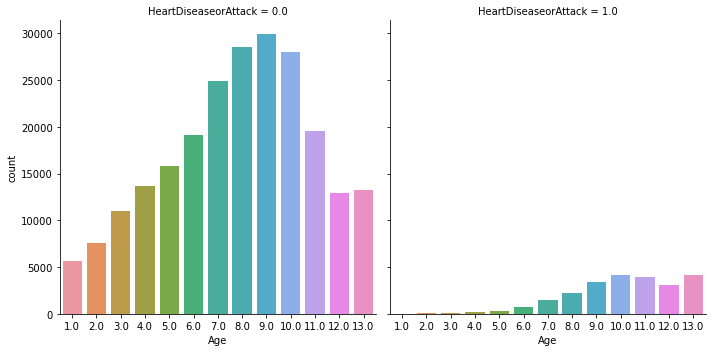

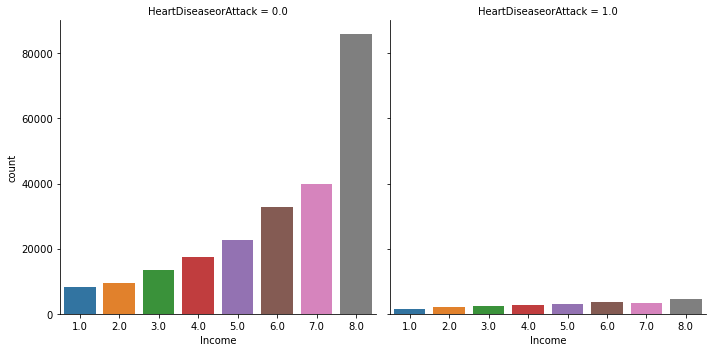

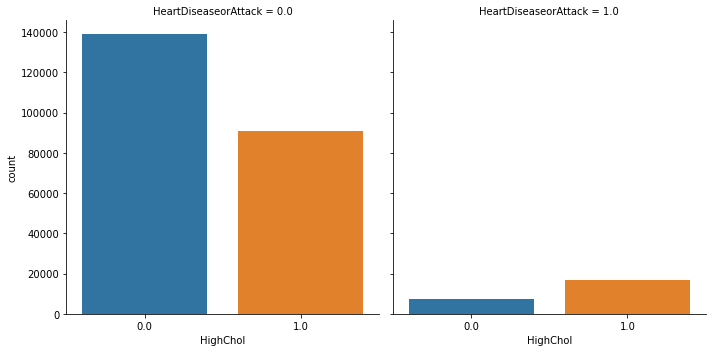

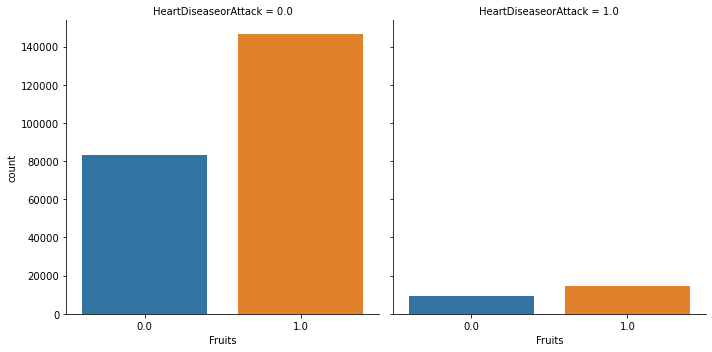

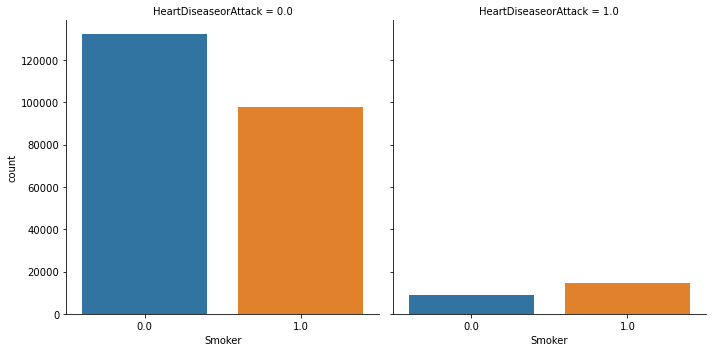

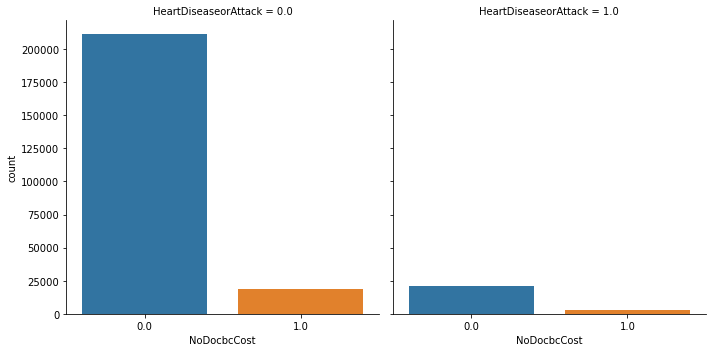

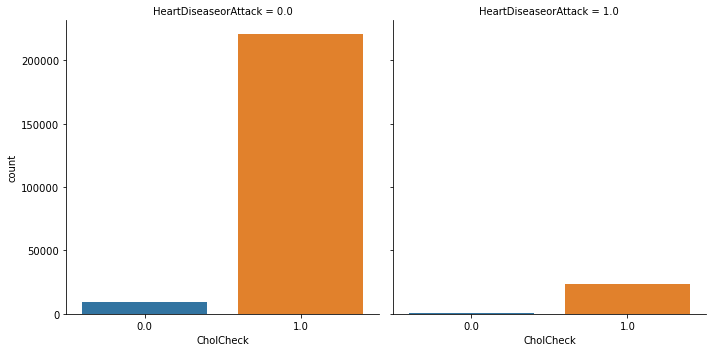

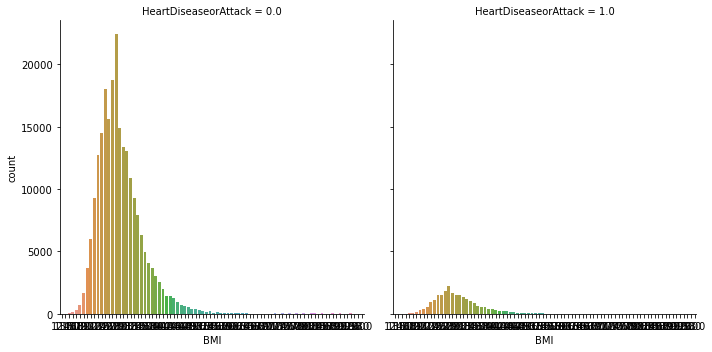

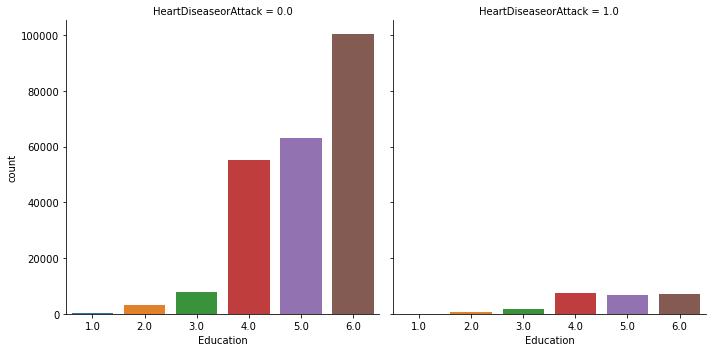

In [11]:
## Features' distriubtion with different labels
cols = list(set(data.columns) - set(['HeartDiseaseorAttack']))
cols = np.array(cols).reshape(3, 7)
fig, axes = plt.subplots(3, 7)

for x in range(cols.shape[0]):
    for y in range(cols.shape[1]):
        sns.catplot(x = cols[x, y], kind = 'count', col='HeartDiseaseorAttack', data =data, ax=axes[x,y])

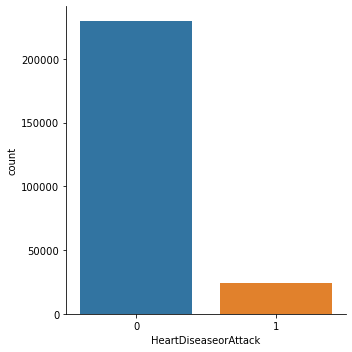

In [32]:
sns.catplot(data=data, x='HeartDiseaseorAttack', kind='count')

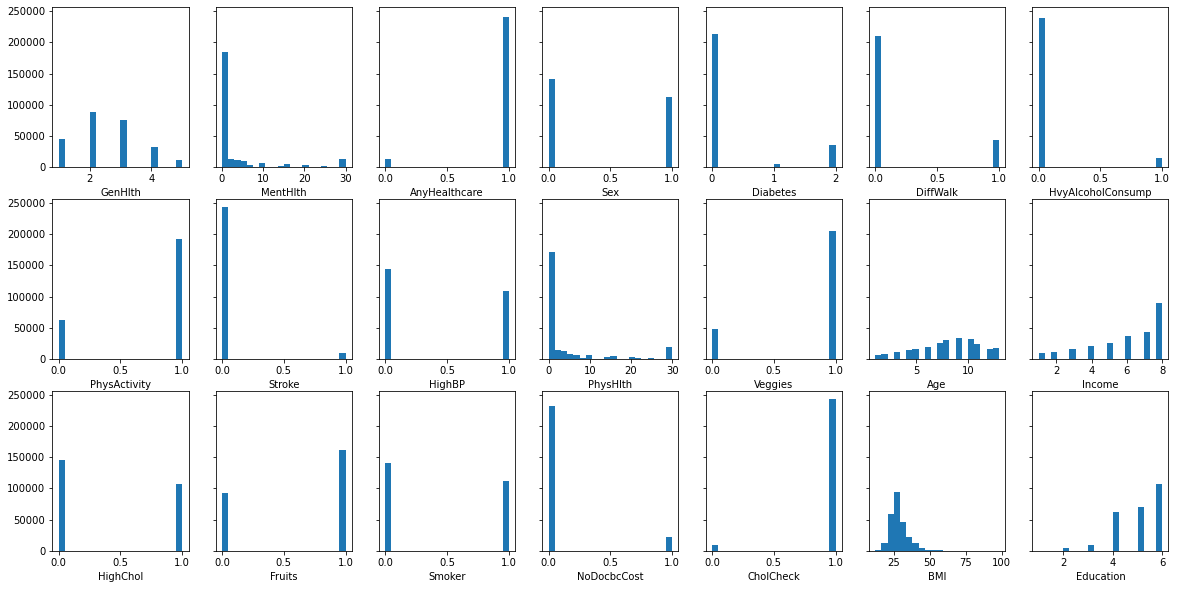

In [12]:
## Features distribution
cols = list(set(data.columns) - set(['HeartDiseaseorAttack']))
cols = np.array(cols).reshape(3, 7)
fig, axes = plt.subplots(3, 7, figsize=(20, 10), sharey=True)

for x in range(cols.shape[0]):
    for y in range(cols.shape[1]):
        axes[x,y].hist(data[cols[x,y]], bins=20)
        #axes[x,y].plot(data[cols[x,y]], color='red')
        axes[x,y].set_xlabel('{}'.format(cols[x,y]))

### use log to change the distribution

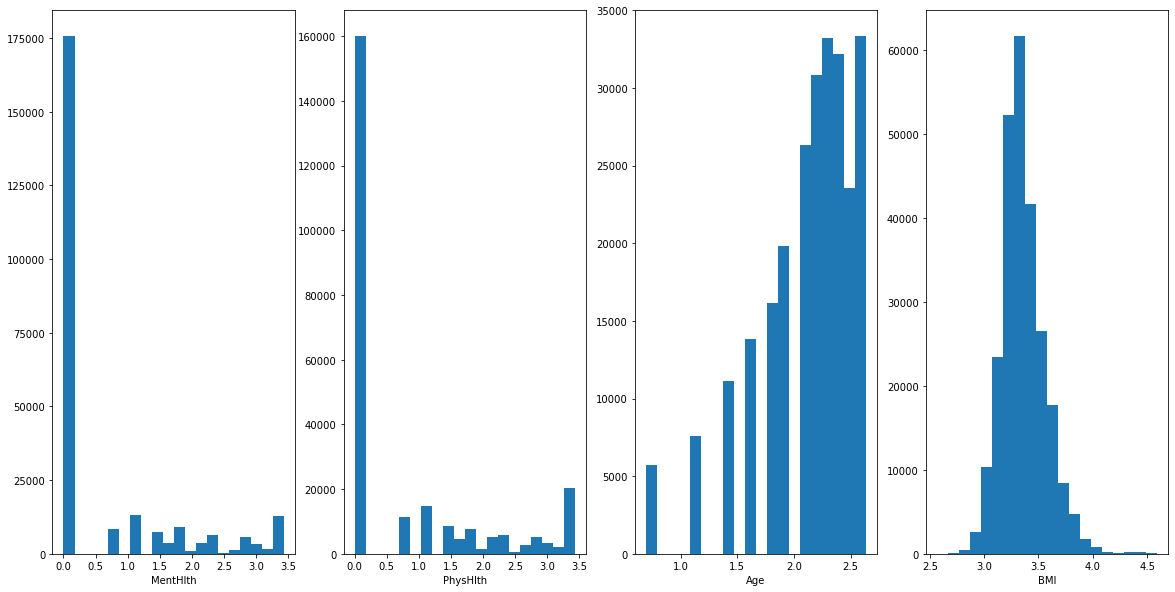

In [17]:
log_features = ['MentHlth', 'PhysHlth', 'Age', 'BMI']
fig, axes = plt.subplots(1, len(log_features), figsize=(20, 10))
for i, fet in zip(range(len(log_features)), log_features):
    axes[i].hist(x = np.log(data[fet]+1), bins=20)
    axes[i].set_xlabel('{}'.format(fet))

### Dimensionality reduction -- vaisualizing data in lower dimension

In [17]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

X = data.drop(columns=['HeartDiseaseorAttack']).to_numpy()
X_trans = StandardScaler().fit_transform(X)
X_embedded = TSNE(n_components=2, learning_rate=500).fit_transform(X_trans)
X_embedded.shape

(253680, 2)

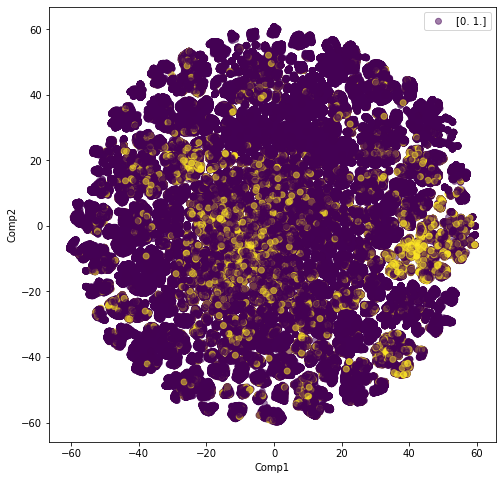

In [18]:
merged = np.concatenate((X_embedded, np.array(data['HeartDiseaseorAttack'])[:, np.newaxis]), axis=1)
plt.figure(figsize=(8,8))
plt.scatter(x = merged[:, 0], y = merged[:, 1], c=merged[:, 2], alpha=0.5, label=np.unique(merged[:,2]))
plt.xlabel('Comp1')
plt.ylabel('Comp2')
plt.legend()

### PCA

Text(0, 0.5, 'second principal component')

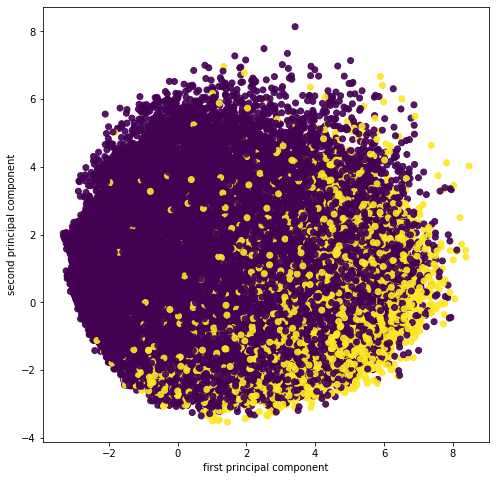

In [13]:
from sklearn.decomposition import PCA
X = data.drop(columns=['HeartDiseaseorAttack']).to_numpy()
X_trans = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
pca.fit(X_trans)
X_pca_scaled = pca.transform(X_trans)
plt.figure(figsize=(8,8))
plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=np.array(data['HeartDiseaseorAttack']), alpha=.9)
plt.xlabel("first principal component")
plt.ylabel("second principal component")

In [23]:
import umap

reducer = umap.UMAP()
X = data.drop(columns=['HeartDiseaseorAttack']).to_numpy()
X_trans = StandardScaler().fit_transform(X)

embedding = reducer.fit_transform(X_trans)
embedding.shape

(253680, 2)

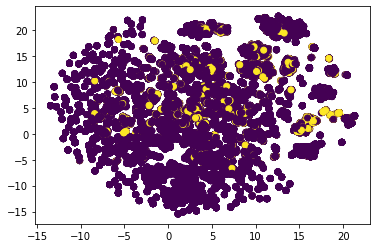

In [24]:
plt.scatter(
embedding[:,0], embedding[:,1],
c = data['HeartDiseaseorAttack'].values)

In [1]:
from sklearn.model_selection import StratifiedKFold
def mean_enc(df, target, cols):
    skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=0)
    for tr_idx, val_idx in skf.split(X, y):
        X_train, X_val = df.iloc[tr_idx], df.iloc[val_idx]
        for col in cols:
            mean_ = X_train.groupby(by=col)['target'].mean()
            X_val[col+'_mean_taregt'] = X_val[col].apply(mean)
        df_new_mean.iloc[val_idx] = X_val
    global_mean = df.target.mean()
    df_new.fillna(global_mean, inplace=True)
    return df_new

In [20]:
percent_1 = data['HeartDiseaseorAttack'].values.sum()/ len(data['HeartDiseaseorAttack'].values)
percent_0 = 1-percent_1
print('Label 0 take {:.2f} percent' .format(percent_0*100))
print('Label 1 take {:.2f} percent' .format(percent_1*100))

Label 0 take 90.58 percent
Label 1 take 9.42 percent


In [25]:
def under_sample(label, target):
    target_usamp = target[target == label]
    target_osamp = target[target != label]
    
    percentage = len(target_usamp) / len(target_osamp)
    resampled_idx = np.random.choice(target, size=percentage*len(target_osamp))
    return resample_idx

In [40]:
ordinal_features = ['Education', 'Age', 'PhysHlth', 'MentHlth','GenHlth']
categorical_features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'PhysActivity', 'Fruits', 'Veggies', 'Diabetes', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost']
continuous_features = ['BMI']

In [32]:
cat_enc = []
for col in categorical_features:
    if data[col].nunique()>2:
        print(col)
        print(data[col].unique())
        cat_enc.append(col)

Diabetes
[0 2 1]


In [43]:
from sklearn.preprocessing import OneHotEncoder
def one_hot_enc(df, cols, is_train=True, encoder=None):
    if is_train == True:
        ohe = OneHotEncoder()
        ohe.fit(df[cols])
        mat = ohe.transform(df[cols]).toarray()
    else:
        mat=encoder.transform(df[cols]).toarray()
    one_hot_name = []
    for col in cols:
        for i in df[col].unique():
            one_hot_name.append(col+ '_' +str(i))
    one_hot_mat = pd.DataFrame(mat, columns=one_hot_name)
    return one_hot_mat, ohe

In [44]:
one_hot_mat, oh_encoder = one_hot_enc(data, ordinal_features+['Diabetes'], is_train=True)

In [45]:
one_hot_mat

,Education_4,Education_6,Education_3,Education_5,Education_2,Education_1,Age_9,Age_7,Age_11,Age_10,...,MentHlth_9,MentHlth_23,GenHlth_5,GenHlth_3,GenHlth_2,GenHlth_4,GenHlth_1,Diabetes_0,Diabetes_2,Diabetes_1
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
253676,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
253677,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
253678,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [48]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, stratify=data['HeartDiseaseorAttack'])

In [50]:
print(len(train[train['HeartDiseaseorAttack'] == 1]) / len(train[train['HeartDiseaseorAttack']==0]))
print(len(test[test['HeartDiseaseorAttack'] == 1]) / len(test[test['HeartDiseaseorAttack']==0]))

0.10398050365556458
0.10397409786411824


## Some topics

+ To do:
    + Regularization for TNSE

+ Compare performace of models
+ target encoding vs one hot encoding
+ use Ordinal directly vs encode
+ A baseline

### Problems

+ Unbalanced data
    + New Metrics
    + Resampling
    + Different models

+ Feature Engineering
    + Cross features
    + Count of features
    + target encoding